Problem Statement :
With the rapid rise in computer network usage and the growing number of applications running on these networks, ensuring network security has become crucial. Many systems face security weaknesses, which can lead to attacks that negatively impact the economy. As a result, identifying vulnerabilities in network systems has become more important than ever and must be done accurately and in real time. This notebook focuses on building and training an SVM classifier to determine whether a network packet indicates an attack or not.

Intrusion Detection Systems (IDS)
An Intrusion Detection System (IDS) is a tool that monitors network activity to identify suspicious behavior and sends alerts when such behavior is detected. It scans a network or system for harmful actions or breaches of security policies. When malicious activity is found, it is typically reported to an administrator or recorded in a centralized system known as a Security Information and Event Management (SIEM) system. SIEM systems combine inputs from different sources and use filtering methods to distinguish real threats from false alarms.

Types of IDS:

Host-Based IDS (HIDS):
A host-based IDS is installed on a specific device to protect it from both internal and external threats. It monitors network traffic to and from the device, examines running processes, and reviews system logs. While it provides deep insight into the internal operations of the device, its scope is limited to the machine it is deployed on, reducing its ability to make decisions based on broader network activity.

Network-Based IDS (NIDS):
A network-based IDS monitors an entire network and analyzes all traffic flowing through it. It identifies threats by examining packet metadata and contents, offering a broader perspective and the ability to detect network-wide attacks. However, it cannot access the internal processes of individual devices, which limits its insight into endpoint activities.

Detection Methods of IDS:

Signature-Based Method:
This method identifies attacks by looking for specific patterns, such as the number of bytes, sequences of 1s or 0s, or known malicious code fragments. These patterns, called "signatures," allow the system to detect threats that match existing records. However, it struggles to identify new or unknown attacks because their patterns are not already recorded in the system.

Anomaly-Based Method:
To address the challenge of identifying new threats, anomaly-based IDS uses machine learning to build a model of normal behavior. Any activity that deviates from this model is flagged as suspicious. Unlike the signature-based approach, anomaly-based IDS has better generalization capabilities, as its models can be adapted to different applications and hardware configurations, making it more effective against evolving malware.

Importing Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
from tensorflow.keras.utils import plot_model
import pydot
import graphviz
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Exploring Dataset :

In [2]:
data_train = pd.read_csv("/Users/sharathkarnati/Desktop/ml_codes/KDDTrain+.txt")


In [3]:
# Check data
print(data_train.head())

   0  tcp ftp_data   SF  491   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0  0  udp    other   SF  146     0    0    0    0    0    0    0    0    0   
1  0  tcp  private   S0    0     0    0    0    0    0    0    0    0    0   
2  0  tcp     http   SF  232  8153    0    0    0    0    0    1    0    0   
3  0  tcp     http   SF  199   420    0    0    0    0    0    1    0    0   
4  0  tcp  private  REJ    0     0    0    0    0    0    0    0    0    0   

   0.10  0.11  0.12  0.13  0.14  0.15  0.16  0.18    2  2.1  0.00  0.00.1  \
0     0     0     0     0     0     0     0     0   13    1   0.0     0.0   
1     0     0     0     0     0     0     0     0  123    6   1.0     1.0   
2     0     0     0     0     0     0     0     0    5    5   0.2     0.2   
3     0     0     0     0     0     0     0     0   30   32   0.0     0.0   
4     0     0     0     0     0     0     0     0  121   19   0.0     0.0   

   0.00.2  0.00.3  1.00  0.00.4  0.00.5  150   25  0.17  0.03  0.17.

In [4]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])


In [5]:
data_train.columns = columns

print(data_train.head())

   duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          1                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [7]:
data_train.describe().style.background_gradient(cmap='magma').set_properties(**{'font-family':'Segoe UI'})


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,45567.100824,19779.271433,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.000000,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5870354.480802,4021285.112110,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.000000,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,276.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1379963888.000000,1309937401.000000,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [8]:
data_train.loc[data_train['outcome'] == "normal", "outcome"] = 'normal'
data_train.loc[data_train['outcome'] != 'normal', "outcome"] = 'attack'

In [9]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

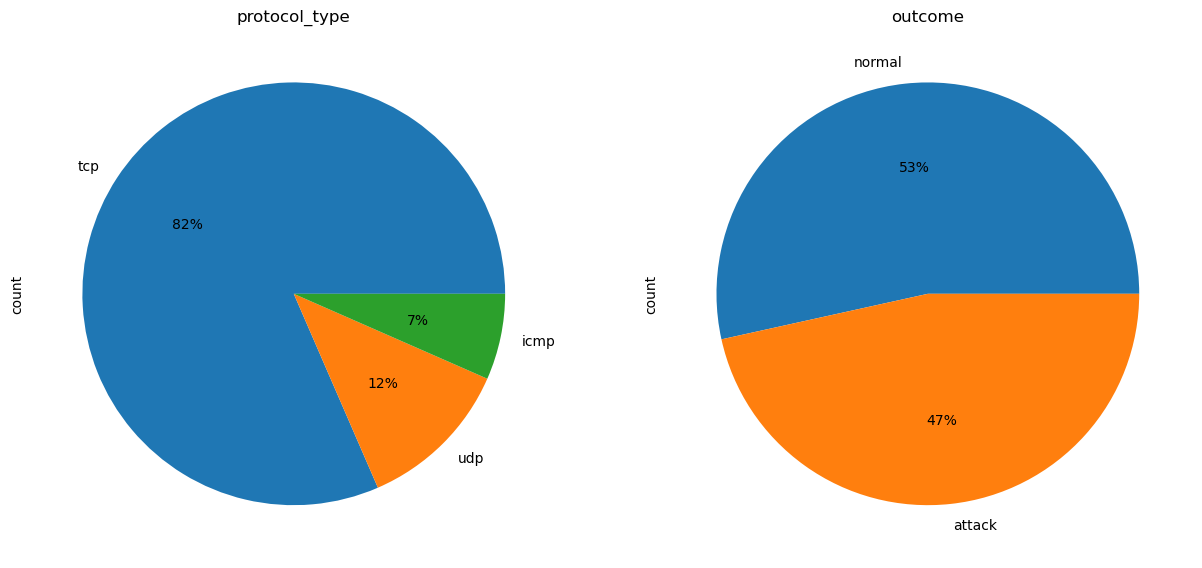

In [10]:
pie_plot(data_train, ['protocol_type', 'outcome'], 1, 2)

Pre-Processing the Data

In [11]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

In [12]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']

In [13]:
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)
    
    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]
    
    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1
    
    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

In [14]:
scaled_train = preprocess(data_train)


Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is a statistical method used to reduce the dimensionality of data by identifying and selecting the most important features that represent the dataset. These features are chosen based on the amount of variance they contribute to the data. The feature causing the highest variance becomes the first principal component, followed by the one causing the second highest variance, and so on. Notably, the principal components are uncorrelated with one another.

Advantages of PCA

Reduced Training Time:
With fewer features, the time required to train machine learning algorithms decreases significantly.
Simplified Data Analysis:
Analyzing data with many dimensions is often impractical. For example, a dataset with 100 features would require 4,950 scatter plots to visualize all pairwise relationships, which is not feasible. PCA helps simplify this process by reducing the number of dimensions.

In [15]:
x = scaled_train.drop(['outcome', 'level'] , axis = 1).values
y = scaled_train['outcome'].values
y_reg = scaled_train['level'].values
pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))
y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)


Number of original features is 122 and of reduced features is 20


In [16]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

The Modeling Process in Machine Learning
Modeling involves training a machine learning algorithm to predict outcomes (labels) based on input data (features), fine-tuning it to meet specific objectives, and validating its performance on a separate dataset. The result of this process is a trained model that can make predictions on new, unseen data.

A machine learning model is essentially a file that has learned to identify patterns from training data. By applying an algorithm to analyze and learn from the data, the model develops the ability to generalize and make predictions on unfamiliar datasets.

For example, to create an application that recognizes emotions based on facial expressions, you would train a model using a dataset of tagged facial images, where each image corresponds to a specific emotion. Once trained, this model could be integrated into an application to identify emotions from any user's facial expressions in real time.

### Logistic Regression

Logistic regression, also known as the logit model, is a statistical method commonly used for classification tasks and predictive analytics. It estimates the probability of an event occurring (e.g., whether a person voted or didn’t vote) based on a set of independent variables. The outcome of logistic regression is a probability, so the dependent variable is bounded between 0 and 1.

In logistic regression, a logit transformation is applied to the odds (the ratio of the probability of success to the probability of failure). This transformation is also called the log odds or the natural logarithm of odds. The logistic function is expressed with the following formulas:

\[
h = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}
\]

Where:
- \( h \) is the dependent or response variable (the predicted probability),
- \( x \) is the independent variable,
- \( \beta_0 \) and \( \beta_1 \) are the coefficients (parameters) estimated during model training.

The coefficients in this model are typically estimated using **Maximum Likelihood Estimation (MLE)**, which involves testing different values of the coefficients through multiple iterations to optimize the log likelihood function. The goal is to maximize this function to find the best parameter estimates. Once the coefficients are found, the model can predict probabilities for each observation. For binary classification, if the predicted probability is less than 0.5, the model predicts 0; otherwise, it predicts 1. Afterward, the model’s performance is assessed using metrics like goodness of fit.

#### Types of Logistic Regression:

**Binary Logistic Regression:**  
In binary logistic regression, the dependent variable has two possible outcomes (e.g., 0 or 1). This is the most common form of logistic regression and is widely used for binary classification tasks such as determining whether an email is spam or not, or if a tumor is malignant or benign.

**Multinomial Logistic Regression:**  
In multinomial logistic regression, the dependent variable has three or more possible outcomes, but there is no inherent order between them. For instance, movie studios might use this model to predict which genre of film a person is likely to watch based on their age, gender, and dating status. This helps businesses target their advertising to specific audiences based on predicted preferences.


Training Accuracy Logistic Regression 87.2272443116981  Test Accuracy Logistic Regression 86.98154395713435
Training Precesion Logistic Regression 85.41592772642868  Test Precesion Logistic Regression 85.39297867042907
Training Recall Logistic Regression 87.43726105807224  Test Recall Logistic Regression 87.12846134304344


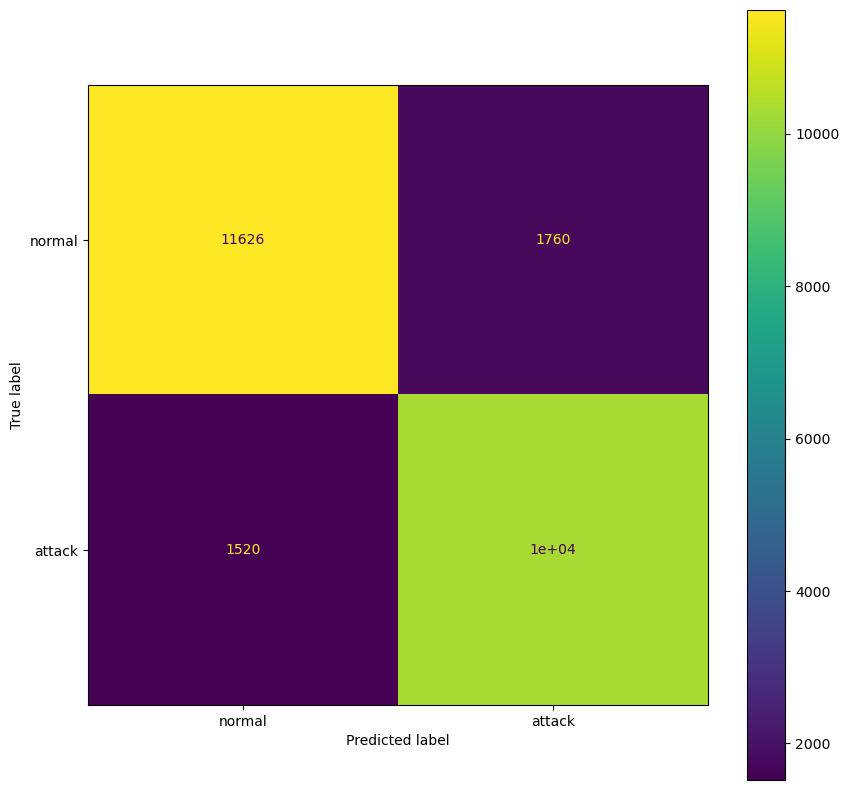

In [17]:
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)


### k-Nearest Neighbors (KNN)

The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning method used for classification or regression tasks. It predicts the class or value of a data point by looking at the 'k' nearest data points in the feature space. The assumption is that similar points tend to be close to one another. KNN is most commonly used for classification, where the label of a data point is determined based on the majority label of its nearest neighbors.

### Determining Distance Metrics

To identify which data points are closest to a given query point, a distance metric is used to calculate the proximity between points. The choice of distance metric affects the decision boundary and, ultimately, the classification of the query point. These decision boundaries can often be visualized with a Voronoi diagram, which illustrates regions of the feature space assigned to each class.

Two common distance metrics used in KNN are **Euclidean Distance** and **Manhattan Distance**.

#### Euclidean Distance Formula

Euclidean distance is the most common distance metric and is calculated as the straight-line distance between two points in space. It is represented by the following formula for two points \( P(x_1, y_1) \) and \( Q(x_2, y_2) \):

\[
d(P, Q) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
\]

For \( n \)-dimensional points, the formula generalizes to:

\[
d(P, Q) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
\]

Where:
- \( P = (x_1, x_2, \dots, x_n) \) and \( Q = (y_1, y_2, \dots, y_n) \) are the two points in the n-dimensional space,
- \( d(P, Q) \) is the Euclidean distance between the two points.

#### Manhattan Distance Formula

Manhattan distance, also known as the L1 norm, is the sum of the absolute differences of the coordinates of two points. It is useful in grid-like environments (like city blocks, hence the name "Manhattan"). The formula for two points \( P(x_1, y_1) \) and \( Q(x_2, y_2) \) is:

\[
d(P, Q) = |x_2 - x_1| + |y_2 - y_1|
\]

For \( n \)-dimensional points, the formula generalizes to:

\[
d(P, Q) = \sum_{i=1}^{n} |x_i - y_i|
\]

Where:
- \( P = (x_1, x_2, \dots, x_n) \) and \( Q = (y_1, y_2, \dots, y_n) \) are the two points in the n-dimensional space,
- \( d(P, Q) \) is the Manhattan distance between the two points.

### Conclusion

Both Euclidean and Manhattan distances are commonly used in KNN to determine the proximity between data points. The choice of distance metric depends on the problem and the nature of the data, with Euclidean distance generally preferred for continuous data in geometric spaces, and Manhattan distance useful when movements are restricted to grid-like spaces.

Training Accuracy KNeighborsClassifier 99.05236313841452  Test Accuracy KNeighborsClassifier 98.93629688430245
Training Precesion KNeighborsClassifier 99.22512234910276  Test Precesion KNeighborsClassifier 99.05636317266003
Training Recall KNeighborsClassifier 98.73133850195424  Test Recall KNeighborsClassifier 98.67050554661698


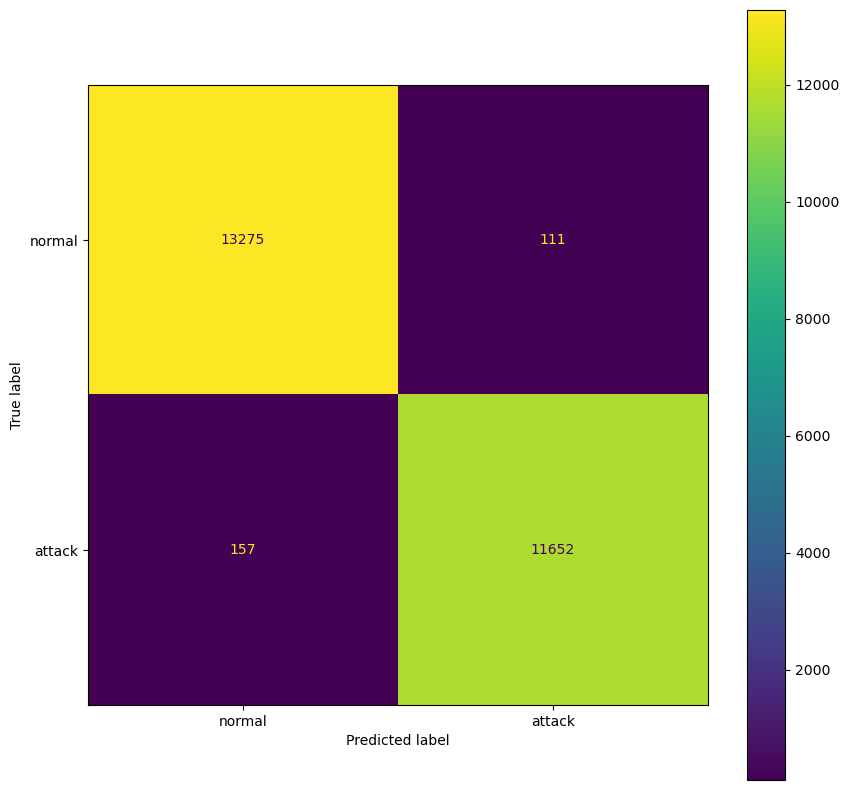

In [18]:
knn = KNeighborsClassifier(n_neighbors=20).fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

### Naive Bayes

Naive Bayes classifiers are a group of classification algorithms based on **Bayes' Theorem**. Unlike a single algorithm, Naive Bayes refers to a family of algorithms that share a common underlying principle: **the features used for classification are assumed to be independent of each other**. This assumption is often referred to as "conditional independence" and, while not typically true in real-world scenarios, Naive Bayes can perform quite well in practice.

#### Bayes' Theorem

Bayes' Theorem is the foundation of Naive Bayes classifiers. It calculates the probability of an event occurring given the probability of another event that has already occurred. The theorem is expressed as:

\[
P(A|B) = \frac{P(B|A) P(A)}{P(B)}
\]

Where:
- \( P(A|B) \) is the **posterior probability** of event \( A \) occurring given that \( B \) is true (what we want to find),
- \( P(B|A) \) is the **likelihood** of event \( B \) occurring given that \( A \) is true,
- \( P(A) \) is the **prior probability** of event \( A \) (the probability of \( A \) before considering \( B \)),
- \( P(B) \) is the **evidence** or **normalizing constant** — the total probability of \( B \).

The goal is to compute the **posterior probability** \( P(A|B) \), which tells us how likely event \( A \) is, given that event \( B \) (the evidence) has occurred.

### How It Works in Naive Bayes

Naive Bayes assumes that the features (attributes) used to describe a data point are **independent** of each other, given the class label. This is a strong assumption that simplifies the computations. Despite this simplification, Naive Bayes often yields good performance, especially for text classification problems, like spam filtering, where the independence assumption holds relatively well for words in a document.

To classify a new instance, Naive Bayes computes the posterior probability for each possible class and selects the class with the highest probability. This process is based on the assumption that features are conditionally independent given the class. The formula for the Naive Bayes classifier is:

\[
P(C_k|X) = \frac{P(C_k) \prod_{i=1}^{n} P(x_i|C_k)}{P(X)}
\]

Where:
- \( P(C_k|X) \) is the posterior probability of class \( C_k \) given the features \( X \),
- \( P(C_k) \) is the prior probability of class \( C_k \),
- \( P(x_i|C_k) \) is the likelihood of feature \( x_i \) given class \( C_k \),
- \( P(X) \) is the evidence or normalizing factor, ensuring the sum of all posterior probabilities equals 1.

### Key Points:
- **Independence assumption**: The key simplification that makes Naive Bayes feasible is assuming that all features are conditionally independent, which means the presence or absence of a feature does not affect the presence or absence of another feature.
- **Good for text classification**: This assumption works well in scenarios like text classification, where the presence of one word doesn't directly impact the presence of another word.
- **Applications**: Naive Bayes is commonly used in spam filtering, sentiment analysis, and other classification tasks where the independence assumption holds reasonably well.

Training Accuracy GaussianNB 91.80269307480874  Test Accuracy GaussianNB 91.60547727723754
Training Precesion GaussianNB 92.62657528189256  Test Precesion GaussianNB 92.53246753246754
Training Recall GaussianNB 89.47907990004485  Test Recall GaussianNB 89.29629943263613


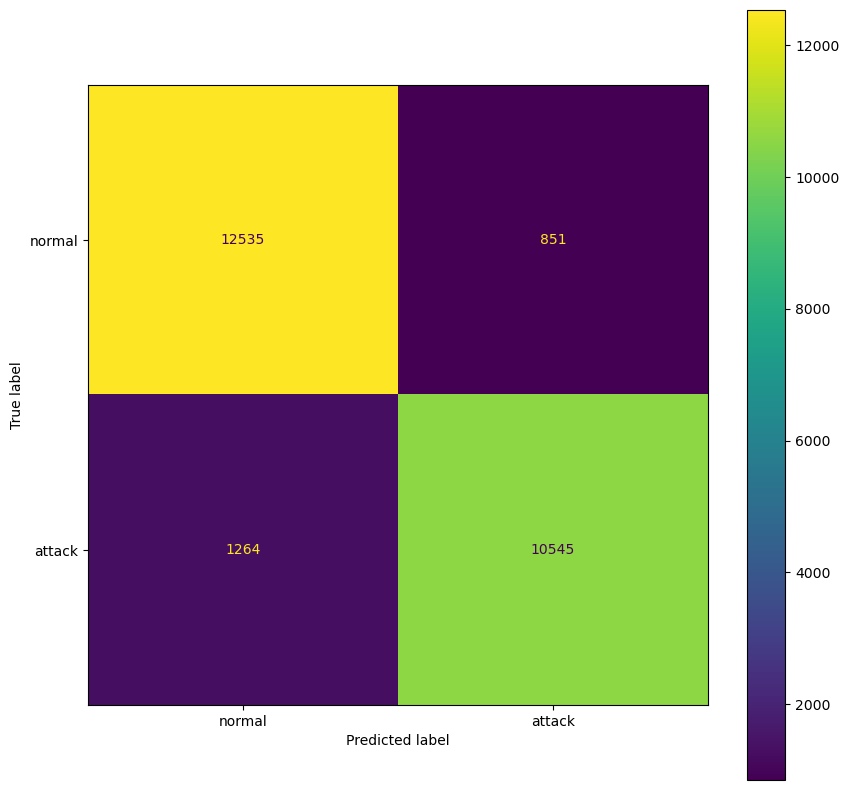

In [19]:
gnb = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb, "GaussianNB", x_train, x_test, y_train, y_test)



### Support Vector Machines (SVM)

A Support Vector Machine (SVM) is a simple supervised machine learning algorithm commonly used for classification, though it can also be applied to regression tasks. While it's often used for classification, it can also be useful in regression problems. Essentially, SVM aims to find a boundary (or "hyperplane") that separates different classes of data. In a 2D space, this boundary is simply a line. 

In SVM, each data point is plotted in an N-dimensional space, where N represents the number of features. The goal is to identify the best possible hyperplane that divides the data into distinct classes. By default, SVM is designed to handle binary classification (i.e., distinguishing between two classes). However, there are ways to extend it for multi-class classification problems.

#### Multi-Class SVM

For multi-class classification, we can set up a separate binary classifier for each class. Each classifier then outputs one of two results:

- The data point belongs to that class.
- The data point does not belong to that class.

For example, if we were classifying different types of fruits, we could create a classifier for each type of fruit. For instance, one classifier would determine whether a fruit is a mango or not. The class with the highest score from its classifier would be chosen as the predicted output.

#### SVM for Non-Linearly Separable Data

SVM works effectively with data that can be separated into distinct classes using a straight line (known as linearly separable data). However, for data that cannot be separated this way, SVM requires adjustments.

To handle non-linearly separable data, we use a **kernelized SVM**. If the data is non-linear in one dimension, we can transform it into two dimensions, where the data may become linearly separable. This is done by mapping the original data points to a new, higher-dimensional space. The kernel function is used to measure how similar two data points are in this new space. There are several types of kernels, but two popular ones are:

- **Radial Basis Function (RBF) Kernel:** This measures similarity between two points as a function of their distance in the transformed feature space. It’s the default kernel used in SVMs because of its effectiveness.
  
- **Polynomial Kernel:** This kernel considers the degree of a polynomial transformation and affects the model's complexity and computation costs.



In [20]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)

Training Accuracy Linear SVC(LBasedImpl) 97.3128789307084  Test Accuracy Linear SVC(LBasedImpl) 97.22960904941456
Training Precesion Linear SVC(LBasedImpl) 97.4323132835853  Test Precesion Linear SVC(LBasedImpl) 97.29292585340939
Training Recall Linear SVC(LBasedImpl) 96.76640823562077  Test Recall Linear SVC(LBasedImpl) 96.78211533576086


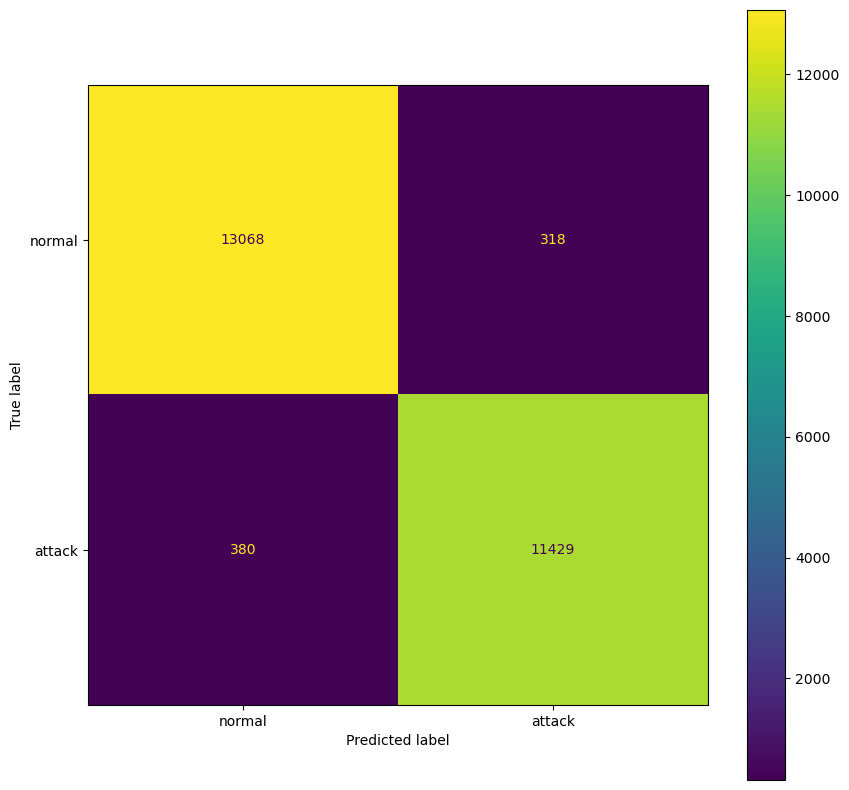

In [21]:
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)

### Decision Tree

A **Decision Tree** is a powerful and widely used tool for both classification and prediction tasks. It’s essentially a tree-like structure, where each internal node represents a test or decision based on an attribute, each branch represents the outcome of that test, and each leaf node (the terminal node) holds the predicted class label.

The process of creating a decision tree is called **recursive partitioning**. This involves splitting the data into subsets based on a particular attribute. This process is recursively applied to each derived subset. Recursion stops when the data at a node has the same target variable value or when further splitting no longer improves predictions.

In a decision tree, classification is done by traversing the tree starting from the root node. Each node tests a certain attribute, and based on the result, the path leads to a branch that represents the possible outcomes. The process continues down the tree until a leaf node is reached, which gives the final classification of the instance.

For example, a decision tree might classify whether a morning is suitable for playing tennis. The root node could check the weather (e.g., sunny, rainy), and depending on the outcome, it will follow a branch to further decisions like "Is the temperature high enough?" or "Is there a forecast for rain?" The final leaf nodes would indicate whether the answer is "Yes" or "No" for playing tennis that morning.

Training Accuracy DecisionTreeClassifier 99.99404626055548  Test Accuracy DecisionTreeClassifier 99.87299067275252
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 99.83918747355057
Training Recall DecisionTreeClassifier 99.98718523739348  Test Recall DecisionTreeClassifier 99.88991447201288


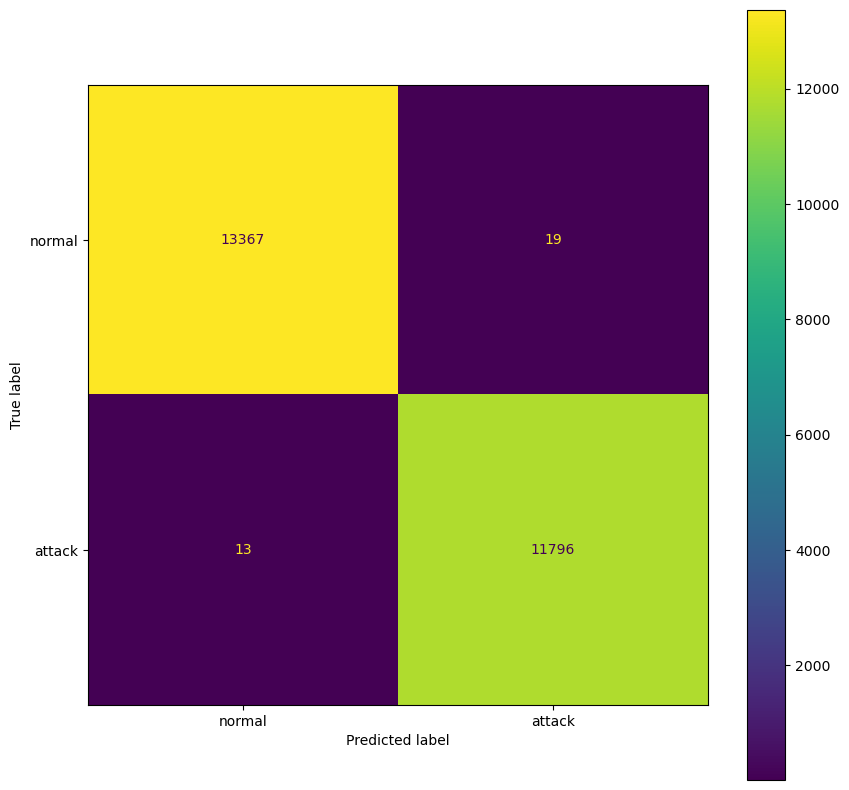

In [22]:

dt = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

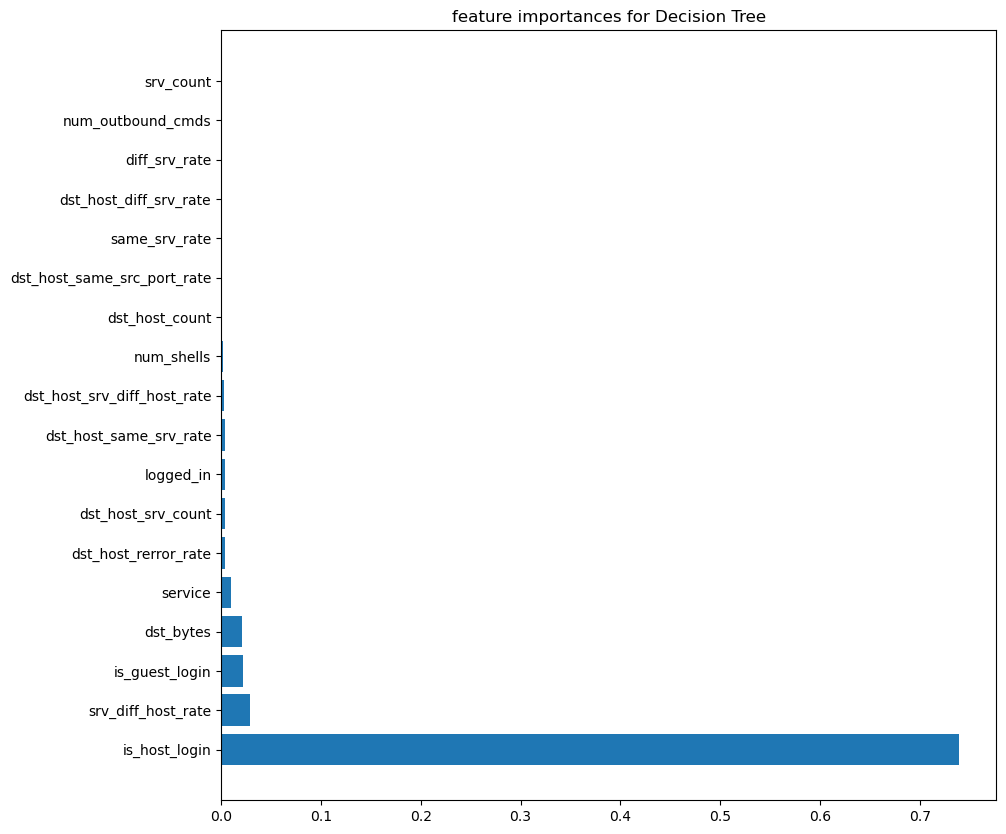

In [23]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    
    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

features_names = data_train.drop(['outcome', 'level'] , axis = 1)
f_importances(abs(tdt.feature_importances_), features_names, top=18)



[Text(0.5, 0.875, 'x[5] <= -0.056\ngini = 0.497\nsamples = 100777\nvalue = [53956, 46821]'),
 Text(0.25, 0.625, 'x[65] <= 0.5\ngini = 0.149\nsamples = 46560\nvalue = [3778, 42782]'),
 Text(0.125, 0.375, 'x[6] <= 0.005\ngini = 0.061\nsamples = 43088\nvalue = [1358, 41730]'),
 Text(0.0625, 0.125, 'gini = 0.031\nsamples = 42229\nvalue = [661, 41568]'),
 Text(0.1875, 0.125, 'gini = 0.306\nsamples = 859\nvalue = [697, 162]'),
 Text(0.375, 0.375, 'x[30] <= -0.211\ngini = 0.422\nsamples = 3472\nvalue = [2420, 1052]'),
 Text(0.3125, 0.125, 'gini = 0.021\nsamples = 1033\nvalue = [11, 1022]'),
 Text(0.4375, 0.125, 'gini = 0.024\nsamples = 2439\nvalue = [2409, 30]'),
 Text(0.75, 0.625, 'x[56] <= 0.5\ngini = 0.138\nsamples = 54217\nvalue = [50178, 4039]'),
 Text(0.625, 0.375, 'x[9] <= 0.5\ngini = 0.066\nsamples = 51813\nvalue = [50032.0, 1781.0]'),
 Text(0.5625, 0.125, 'gini = 0.027\nsamples = 49719\nvalue = [49043, 676]'),
 Text(0.6875, 0.125, 'gini = 0.498\nsamples = 2094\nvalue = [989, 1105]'),

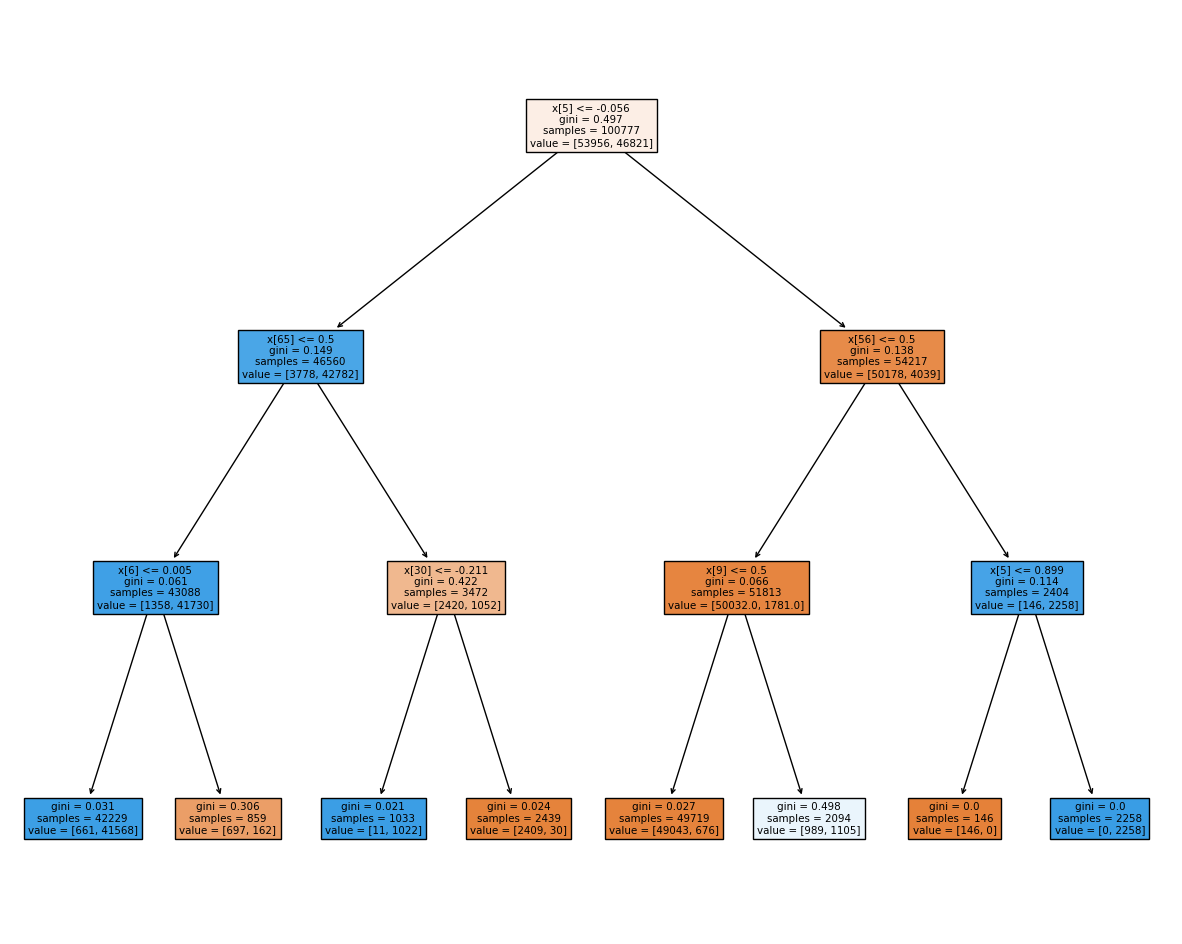

In [24]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

### Random Forest

**Random Forest** is a supervised learning algorithm that builds a "forest" consisting of many decision trees. These trees are typically trained using a method called **bagging** (Bootstrap Aggregating), where multiple models are trained on different random subsets of the data, and their results are combined to produce a final prediction. The main idea behind bagging is that combining multiple models together can improve the overall performance compared to relying on a single model.

One of the key advantages of **Random Forest** is its ability to handle both **classification** and **regression** tasks, making it versatile and suitable for many machine learning applications. Unlike a single decision tree, which may overfit the training data, Random Forest tends to resist overfitting. This is because the model is built on multiple trees, each of which has slightly different data, leading to more robust and generalized predictions. By averaging the predictions from multiple trees (in the case of regression) or using majority voting (in the case of classification), Random Forest can deliver more accurate and reliable results.

Training Accuracy RandomForestClassifier 99.99404626055548  Test Accuracy RandomForestClassifier 99.89283588013494
Training Precesion RandomForestClassifier 99.9914571898426  Test Precesion RandomForestClassifier 99.94065785011868
Training Recall RandomForestClassifier 99.99572841246449  Test Recall RandomForestClassifier 99.83063764925058


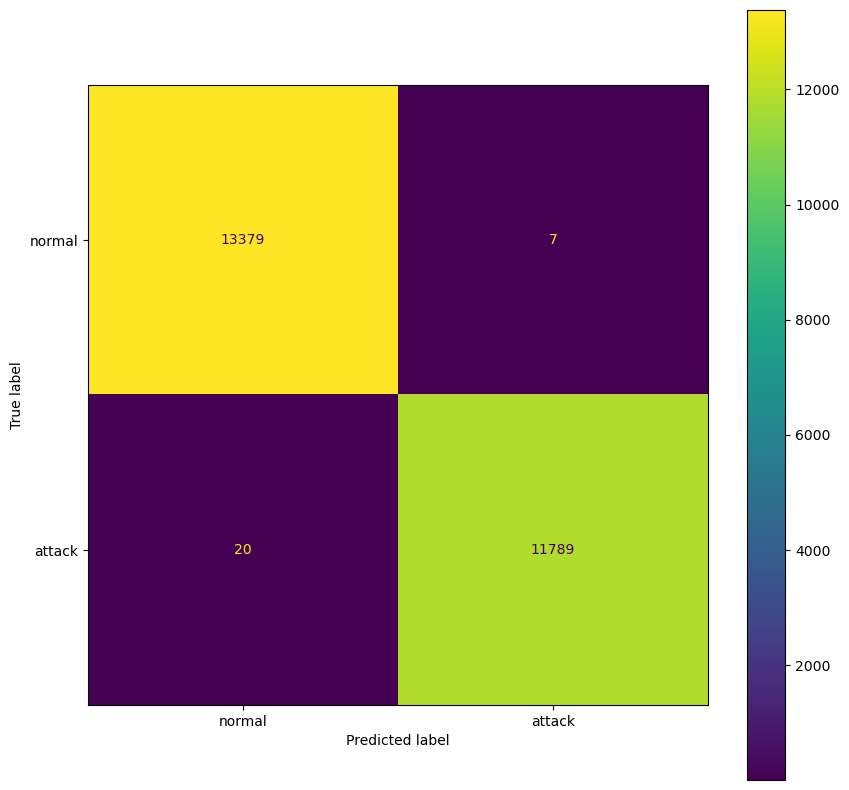

In [25]:
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

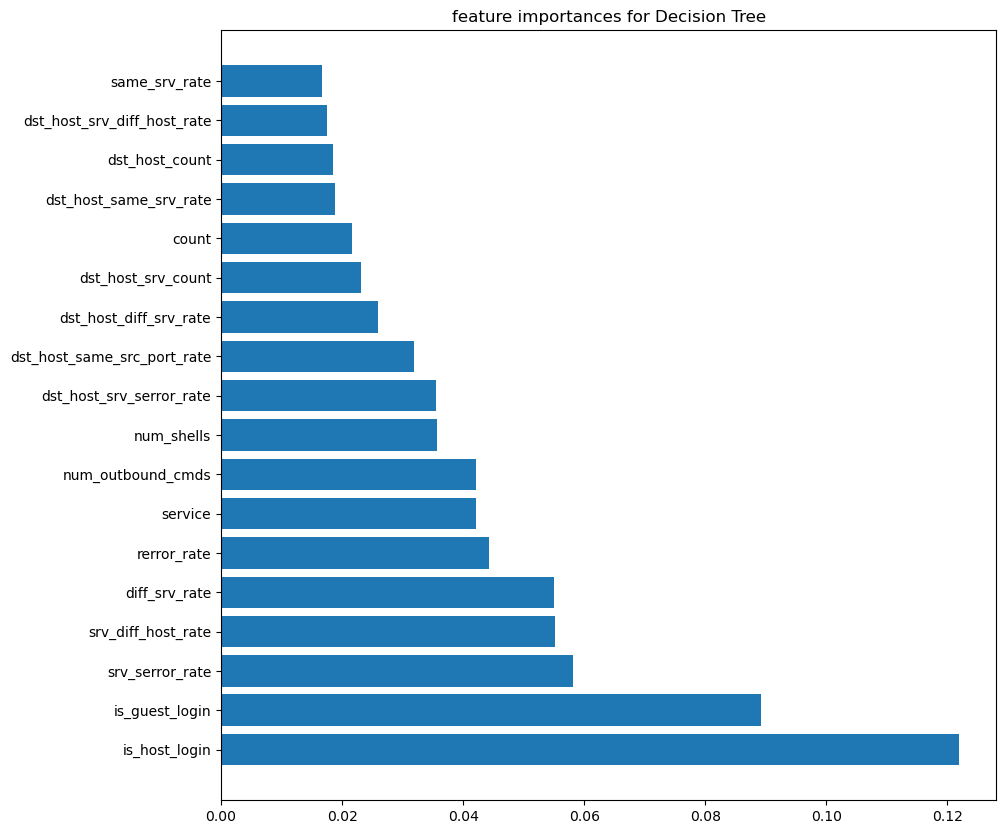

In [26]:
f_importances(abs(rf.feature_importances_), features_names, top=18)


Building an XGBoost Regressor in order to predict threat level:

Training Error XGBOOST 0.9286577828406372  Test error XGBOOST 0.9955133892384386


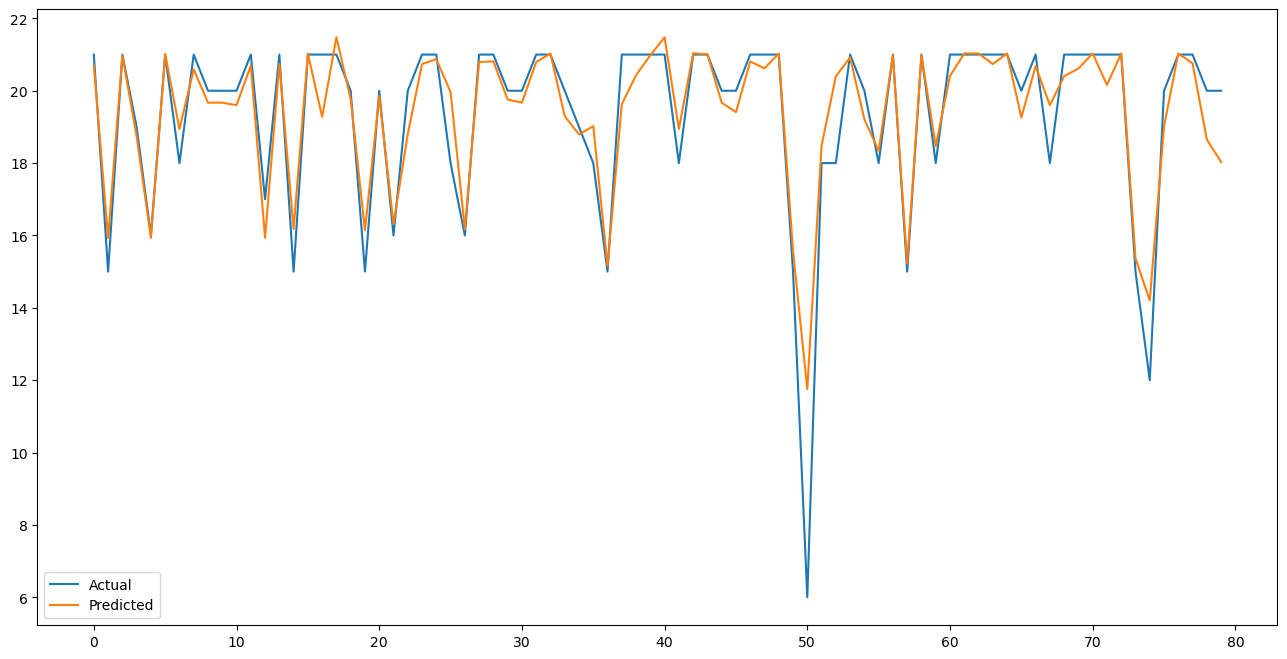

In [27]:
xg_r = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 20).fit(x_train_reg, y_train_reg)
name = "XGBOOST"
train_error = metrics.mean_squared_error(y_train_reg, xg_r.predict(x_train_reg), squared=False)
test_error = metrics.mean_squared_error(y_test_reg, xg_r.predict(x_test_reg), squared=False)
print("Training Error " + str(name) + " {}  Test error ".format(train_error) + str(name) + " {}".format(test_error))
y_pred = xg_r.predict(x_test_reg)
df = pd.DataFrame({"Y_test": y_test_reg , "Y_pred" : y_pred})
plt.figure(figsize=(16,8))
plt.plot(df[:80])
plt.legend(['Actual' , 'Predicted'])

Measuring Effect of PCA:

Training Accuracy PCA RandomForest 99.99404626055548  Test Accuracy PCA RandomForest 99.8293312165112
Training Precesion PCA RandomForest 99.99359261869674  Test Precesion PCA RandomForest 99.92362525458248
Training Recall PCA RandomForest 99.99359261869674  Test Recall PCA RandomForest 99.71208400372598


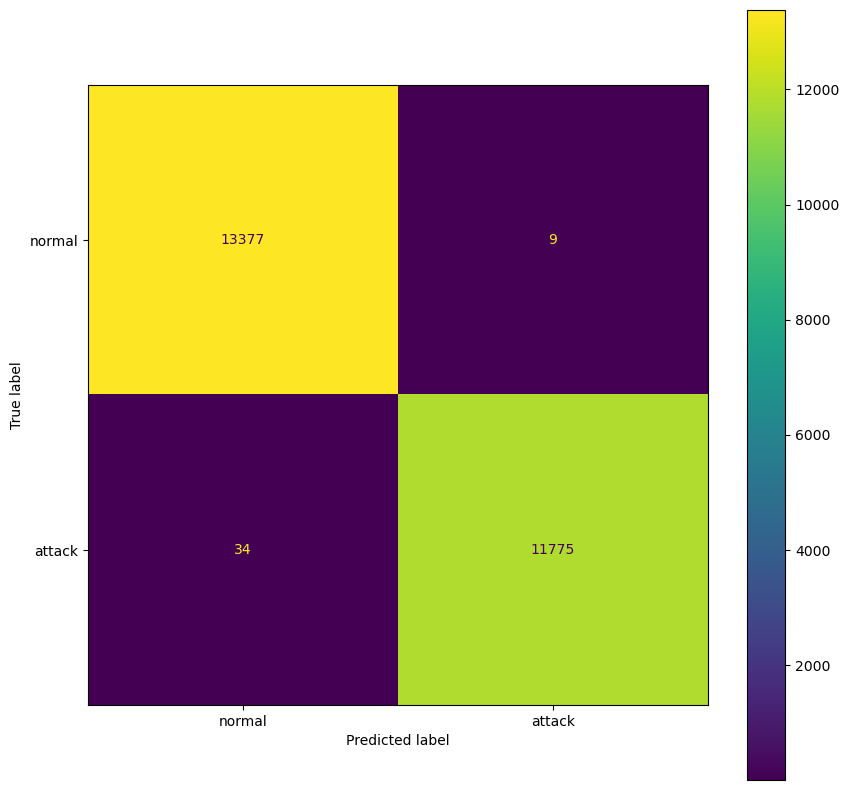

In [28]:
rrf = RandomForestClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(rrf, "PCA RandomForest", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)


### Neural Networks

**Neural networks** (also known as **artificial neural networks** or **ANNs**) are a subset of machine learning models that play a central role in deep learning algorithms. The name and structure of neural networks are inspired by the way biological neurons communicate in the human brain.

An **artificial neural network** consists of **layers of nodes** (neurons) that are connected to each other. These layers include:

1. **Input Layer**: The first layer where the model receives input data.
2. **Hidden Layers**: One or more layers where data is processed through weighted connections between neurons.
3. **Output Layer**: The final layer that produces the output or prediction.

Each **node** or **neuron** has an associated **weight** and **threshold**. When the output from a node exceeds its threshold, the node is "activated" and sends data to the next layer. If the output is below the threshold, the node does not pass any data forward. This process helps the network "learn" and adjust over time.

Neural networks use **training data** to learn and improve their performance. By adjusting the weights and thresholds through a process called **backpropagation**, the network can optimize its predictions. Once fine-tuned, neural networks become powerful tools capable of solving complex tasks like **image recognition**, **speech recognition**, and **data classification**.

Because neural networks can handle large amounts of data quickly, they significantly speed up tasks that would otherwise take humans much longer. For example, Google's search algorithm is based on neural networks, allowing it to rank and retrieve search results almost instantaneously.


In [29]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(x_train.shape[1:]), 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=512, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         7,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 148,033 (578.25 KB)

 Trainable params: 148,033 (578.25 KB)

 Non-trainable params: 0 (0.00 B)

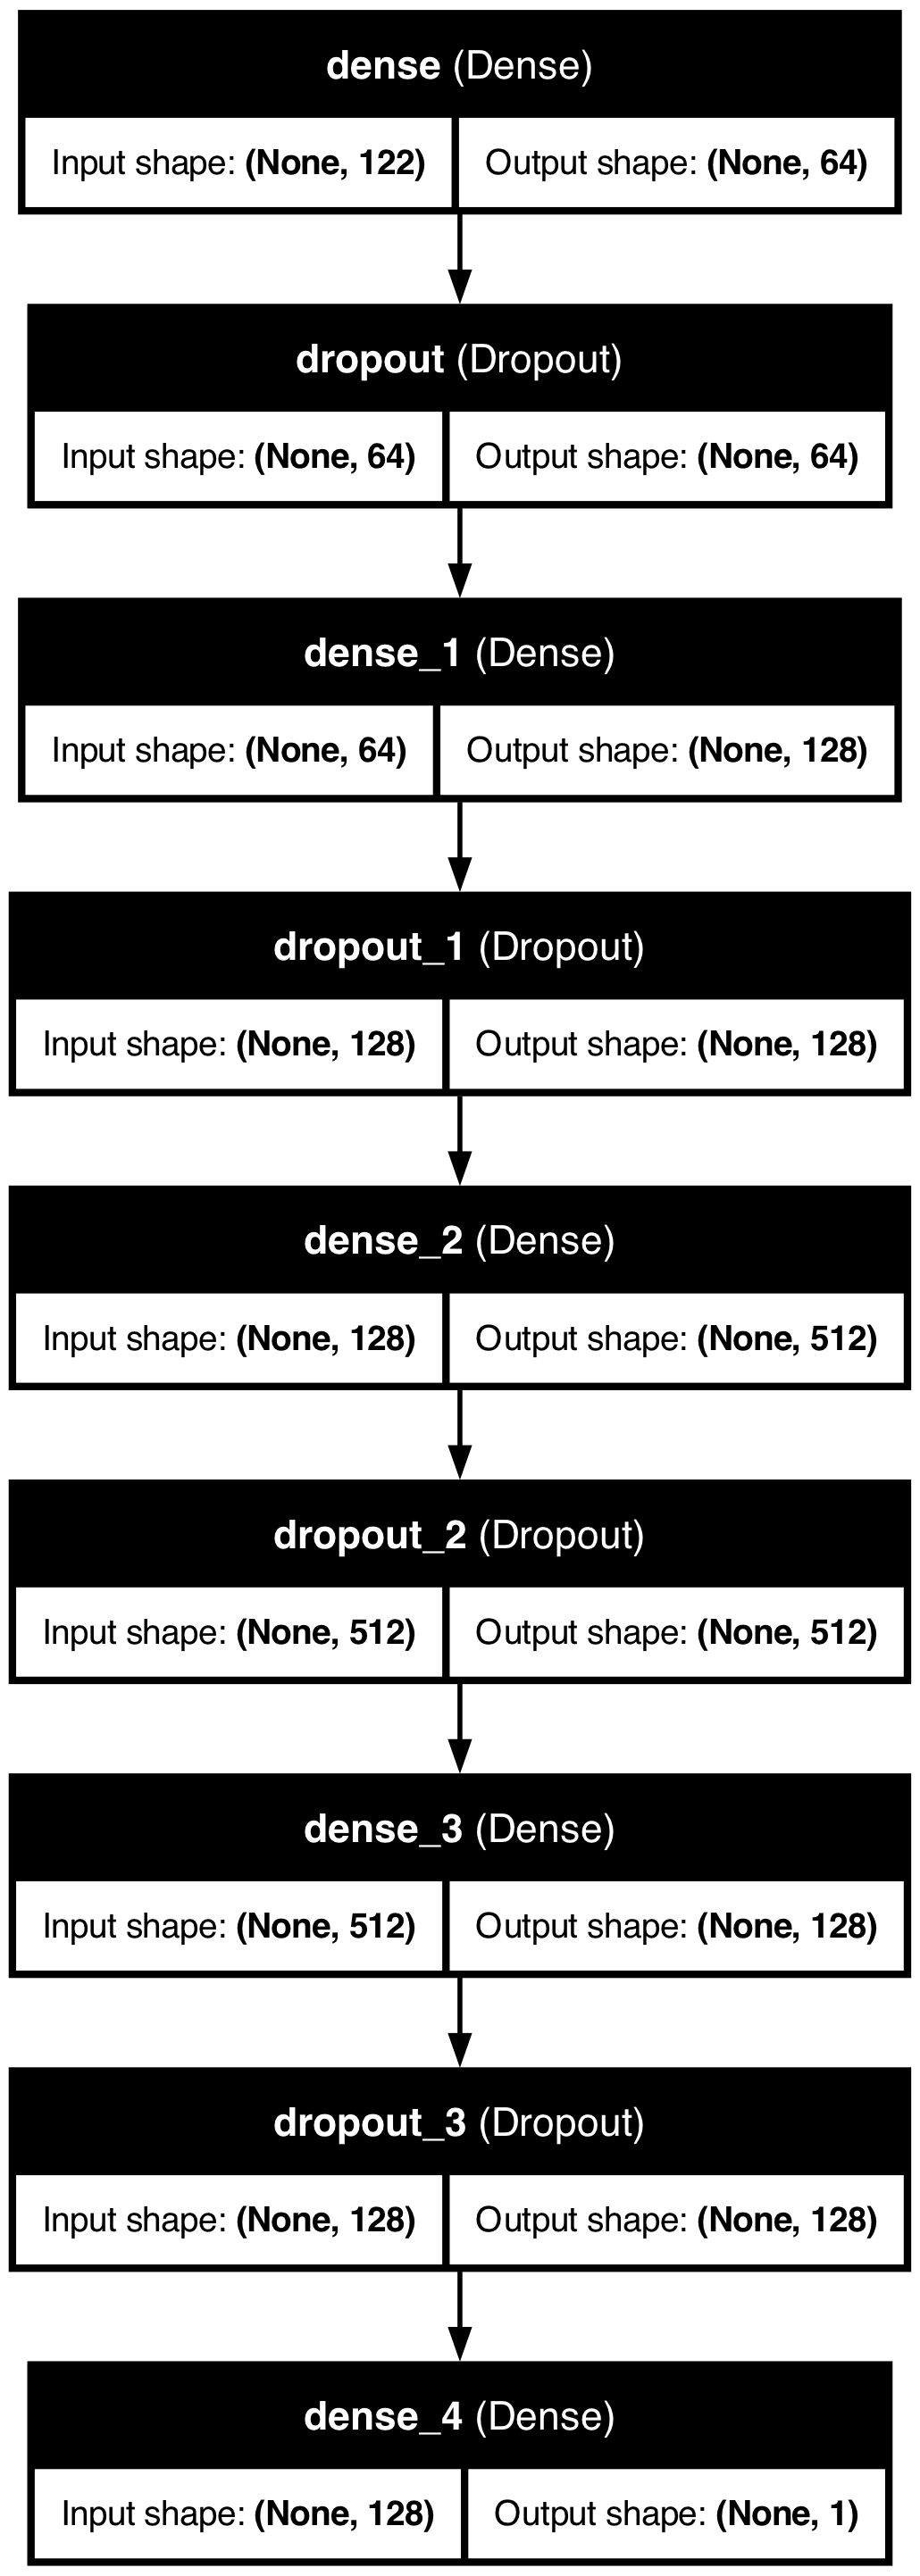

In [32]:

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [36]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder


print(f"x_train dtype: {x_train.dtype}")
print(f"x_test dtype: {x_test.dtype}")


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


y_train = y_train.astype('int64')
y_test = y_test.astype('int64')


print(f"x_train dtype after conversion: {x_train.dtype}")
print(f"x_test dtype after conversion: {x_test.dtype}")
print(f"y_train dtype after conversion: {y_train.dtype}")
print(f"y_test dtype after conversion: {y_test.dtype}")


model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))  # input_dim based on your data
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)



x_train dtype: object
x_test dtype: object
x_train dtype after conversion: float32
x_test dtype after conversion: float32
y_train dtype after conversion: int64
y_test dtype after conversion: int64
Epoch 1/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 348us/step - accuracy: 0.9528 - loss: 8.7245 - val_accuracy: 0.9828 - val_loss: 7.4090
Epoch 2/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 331us/step - accuracy: 0.9741 - loss: 5.8192 - val_accuracy: 0.9794 - val_loss: 8.3575
Epoch 3/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 335us/step - accuracy: 0.9763 - loss: 8.4723 - val_accuracy: 0.9777 - val_loss: 33.0944
Epoch 4/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - accuracy: 0.9820 - loss: 7.8100 - val_accuracy: 0.9825 - val_loss: 48.8741
Epoch 5/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 332us/step - accuracy: 0.9805 - loss: 11.8157 - val_accuracy: 0.9821 - val_loss: 63.8986
Epoch 6/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 332us/step - accuracy: 0.9832 - loss: 13.3881 - val_accuracy: 0.9862 - val_loss: 10.0857
Epoch

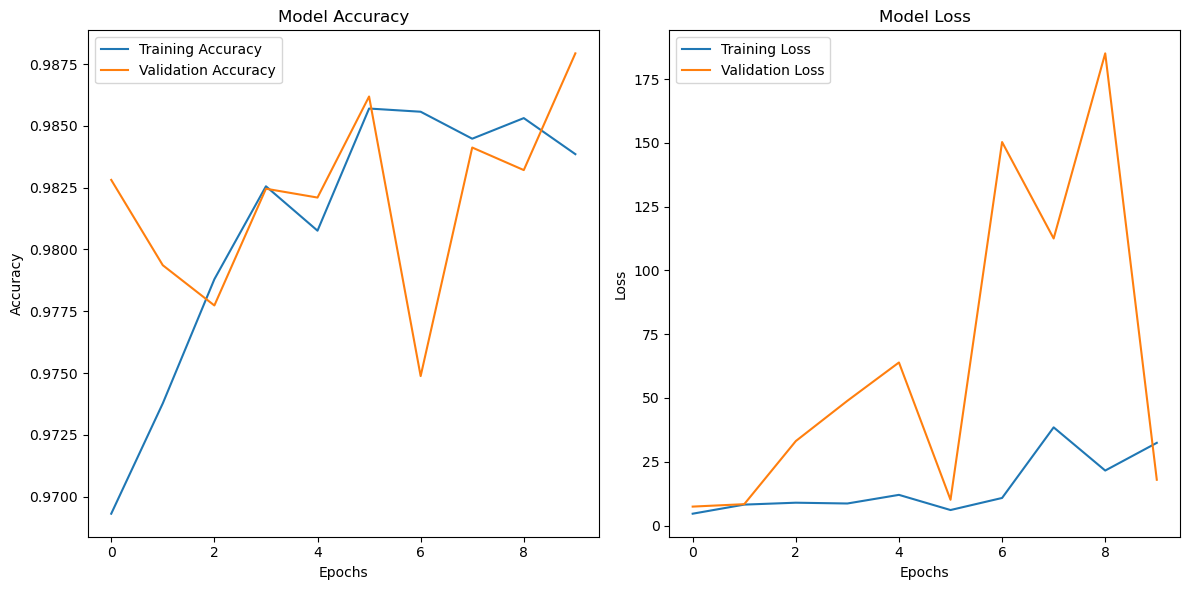

In [37]:
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 337us/step - accuracy: 0.9860 - loss: 47.2605 - val_accuracy: 0.9810 - val_loss: 158.6505
Epoch 2/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - accuracy: 0.9846 - loss: 62.4835 - val_accuracy: 0.9816 - val_loss: 13.2495
Epoch 3/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 329us/step - accuracy: 0.9831 - loss: 80.6349 - val_accuracy: 0.9851 - val_loss: 78.7820
Epoch 4/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 332us/step - accuracy: 0.9850 - loss: 19.2749 - val_accuracy: 0.9763 - val_loss: 119.9003
Epoch 5/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 346us/step - accuracy: 0.9836 - loss: 24.3969 - val_accuracy: 0.9834 - val_loss: 150.8208
Epoch 6/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 336us/step - accuracy: 0.9862 - loss: 45.9810 - val_accuracy: 0.9866 - val_loss: 1.9583
Epoch 7/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 337us/step - accuracy: 0.9828 - loss: 36.2681 - val_accuracy: 0.9805 - val_loss: 31.9304
Epoch 8/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 344us/step - ac

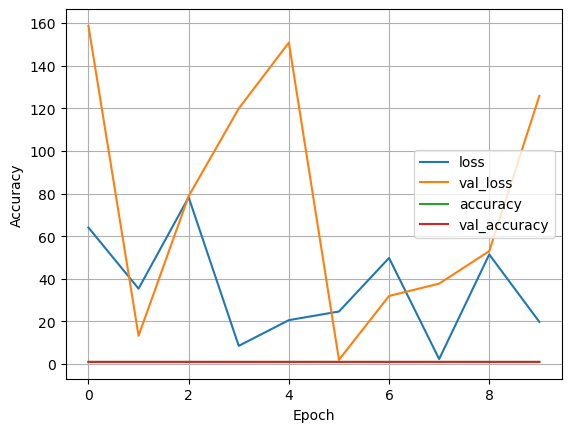

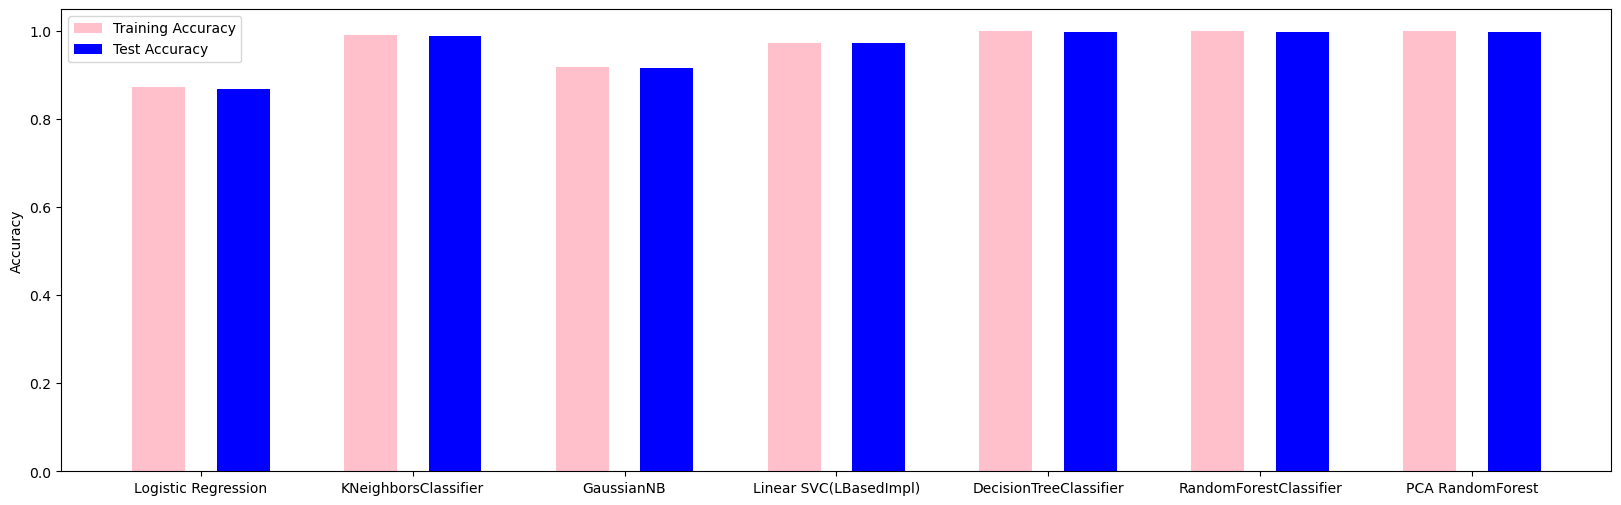

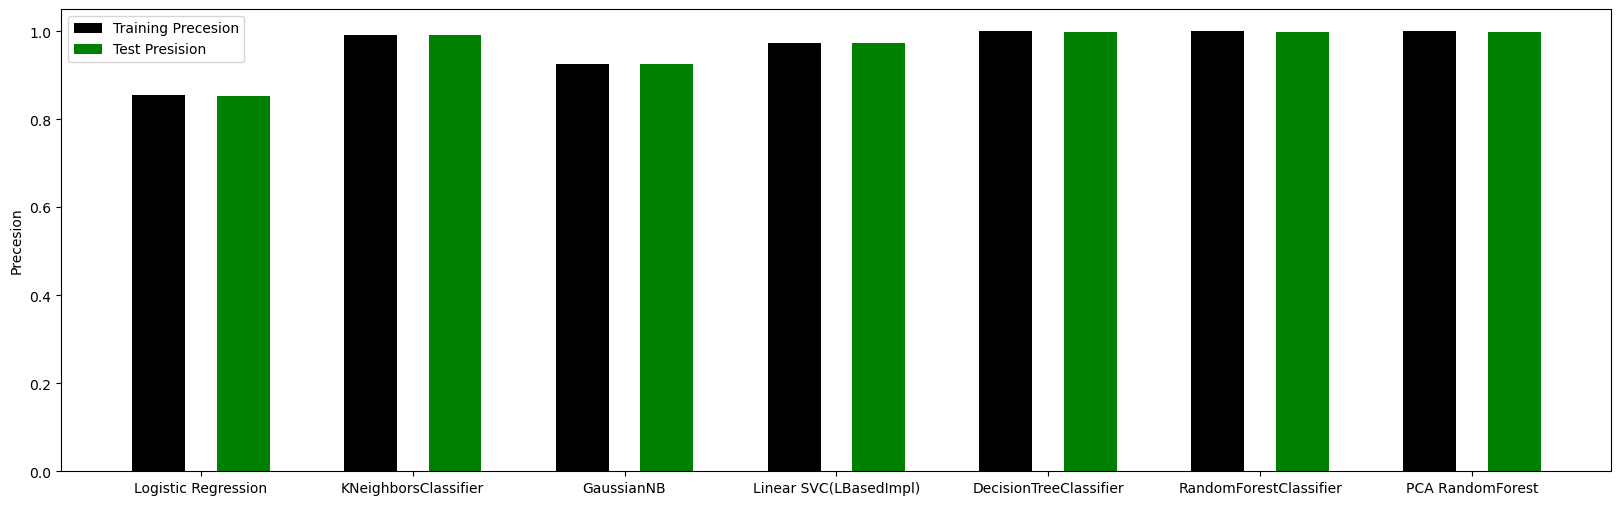

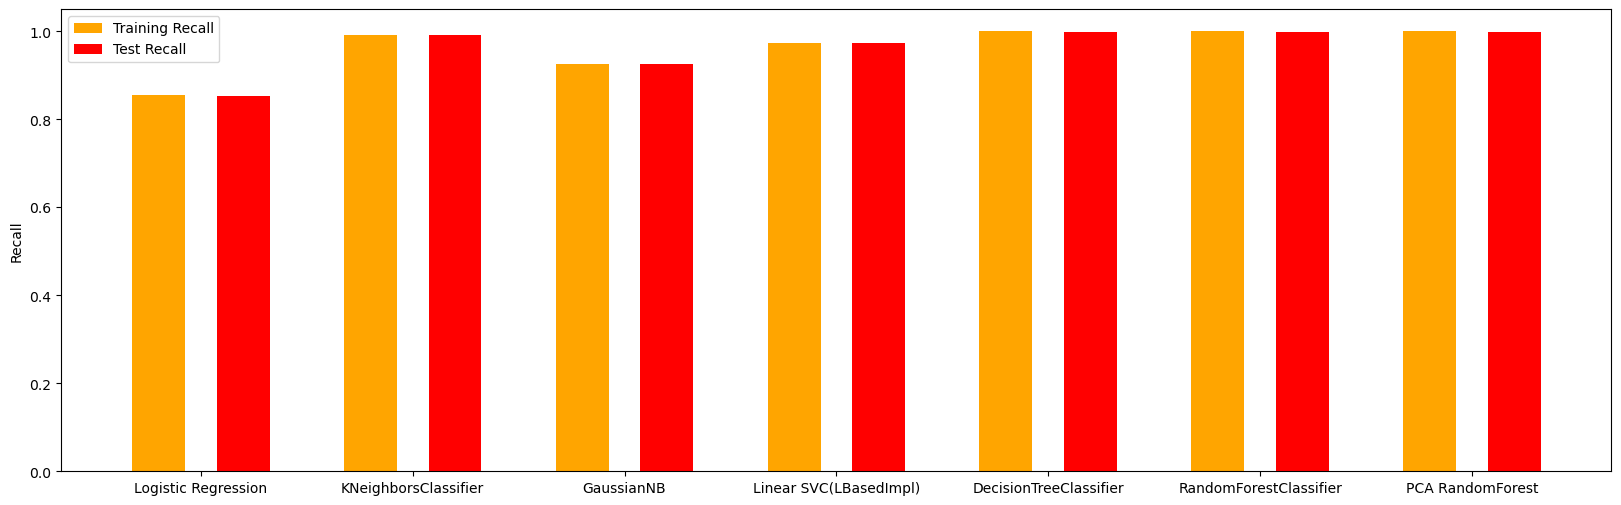

In [38]:



x_train = x_train.astype(float)
x_test = x_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)


x_train = np.nan_to_num(x_train, nan=np.nanmean(x_train))
x_test = np.nan_to_num(x_test, nan=np.nanmean(x_test))


label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='pink', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='blue', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='black', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='green', width=0.25, align='center')
ax.legend(["Training Precesion", "Test Presision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precesion")
plt.show()

keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='orange', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='red', width=0.25, align='center')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.show()


In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Load the datasets
data_train = pd.read_csv("/Users/sharathkarnati/Desktop/ml_codes/KDDTrain+.txt", header=None)
data_test = pd.read_csv("/Users/sharathkarnati/Desktop/ml_codes/KDDTest+.txt", header=None)

# Define column names based on NSL-KDD documentation
columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", 
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", 
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", 
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", 
    "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", 
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", 
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", 
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", 
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", 
    "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", 
    "dst_host_srv_rerror_rate", "label", "extra"
]

# Debug column mismatch
if data_train.shape[1] != len(columns):
    print(f"Mismatch in training data: {data_train.shape[1]} columns vs {len(columns)} expected.")
if data_test.shape[1] != len(columns):
    print(f"Mismatch in testing data: {data_test.shape[1]} columns vs {len(columns)} expected.")

# Assign column names to match dataset dimensions
data_train.columns = columns[:data_train.shape[1]]
data_test.columns = columns[:data_test.shape[1]]

# Drop the extra column if it exists
if 'extra' in data_train.columns:
    data_train.drop(columns=['extra'], inplace=True)
if 'extra' in data_test.columns:
    data_test.drop(columns=['extra'], inplace=True)

# Encode categorical features
categorical_columns = ["protocol_type", "service", "flag"]
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data_train[col] = le.fit_transform(data_train[col])
    data_test[col] = le.transform(data_test[col])  # Use the same encoder for test data
    label_encoders[col] = le

# Normalize numerical features
scaler = MinMaxScaler()
numerical_columns = data_train.select_dtypes(include=['int64', 'float64']).columns[:-1]
data_train[numerical_columns] = scaler.fit_transform(data_train[numerical_columns])
data_test[numerical_columns] = scaler.transform(data_test[numerical_columns])

# Define normal vs. anomaly classes
data_train['is_anomaly'] = data_train['label'].apply(lambda x: 0 if x == 'normal' else 1)
data_test['is_anomaly'] = data_test['label'].apply(lambda x: 0 if x == 'normal' else 1)

# Split data into features and labels
X_train = data_train.drop(columns=['label', 'is_anomaly'])
y_train = data_train['is_anomaly']
X_test = data_test.drop(columns=['label', 'is_anomaly'])
y_test = data_test['is_anomaly']

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=['Normal', 'Anomaly'])
roc_auc = roc_auc_score(y_test, y_pred)

# Print results
print("Classification Report:")
print(report)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Classification Report:
              precision    recall  f1-score   support

      Normal       0.67      0.97      0.79      9711
     Anomaly       0.97      0.63      0.76     12833

    accuracy                           0.78     22544
   macro avg       0.82      0.80      0.78     22544
weighted avg       0.84      0.78      0.78     22544

ROC-AUC Score: 0.80


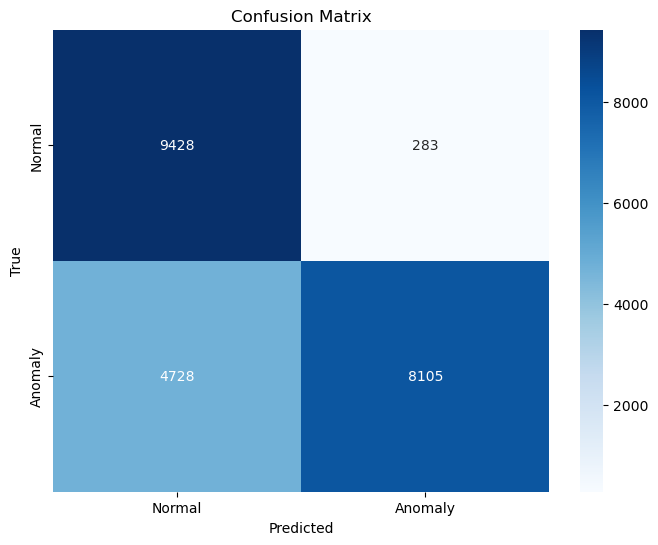

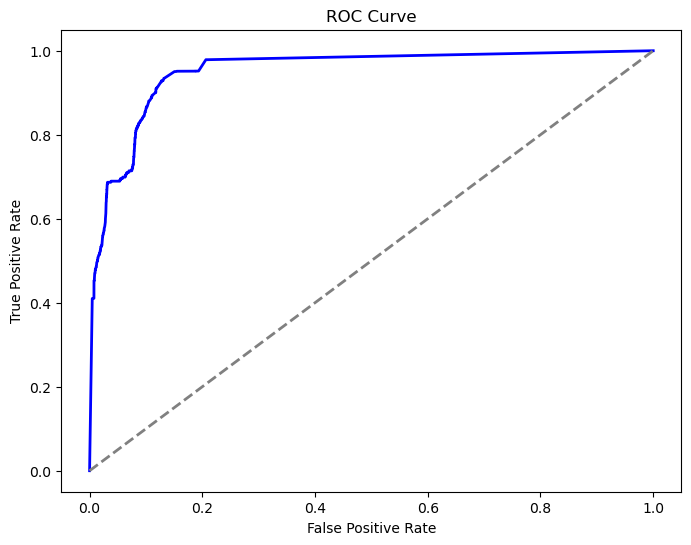

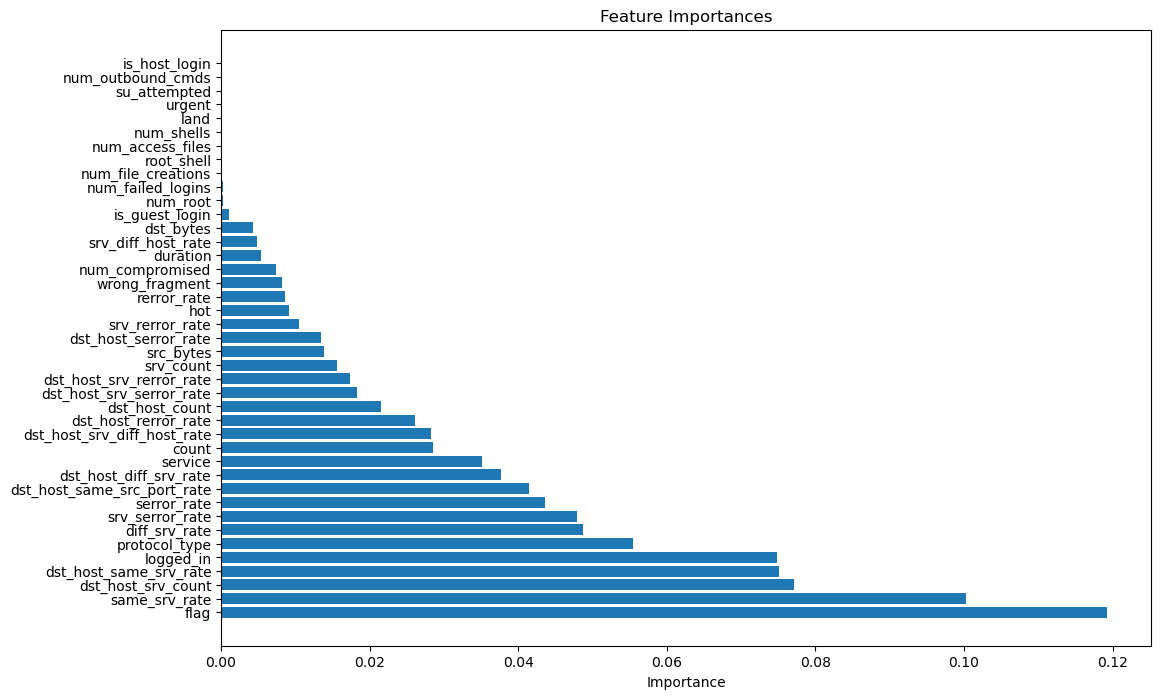

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve
import numpy as np

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [columns[i] for i in indices])
plt.xlabel('Importance')
plt.show()